# Machine Learning: Unsupervised Learning

In [1]:
# Dependencies
import pandas as pd
import sqlite3

In [2]:
# Connect to a sqlite database
conn = sqlite3.connect("Data/Hotels.db")

# Get the data from alldata table
alldata = pd.read_sql_query("select * from alldata;", conn)
conn.close()

# Preview the dataframe
alldata.head()

,Name,reviews_rating,airportDistance_km,airport,apartment,attractions,bars,beach,boutique,breakfast,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Rancho Valencia Resort Spa,5.0,14.308848055373579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,Rancho Valencia Resort Spa,5.0,14.308848055373579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,Rancho Valencia Resort Spa,5.0,14.308848055373579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,Aloft Arundel Mills,2.0,4.668331572785505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,Aloft Arundel Mills,5.0,4.668331572785505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# Convert hotel features and locations from string to float
col_headers = list(alldata.columns)[2:]

alldata[col_headers] = alldata[col_headers].apply(pd.to_numeric, errors = "coerce", axis = 1)

# Convert ratings, hotel features, locations, years from float to int
col_headers2 = list(alldata.columns)[1:]

alldata[col_headers2] = alldata[col_headers2].astype(int)

In [4]:
# Group the hotels by name
df = alldata.groupby("Name").median()
df.head()

,reviews_rating,airportDistance_km,airport,apartment,attractions,bars,beach,boutique,breakfast,cabins,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Name,,,,,,,,,,,,,,,,,,,,,
1906 Lodge At Coronado Beach,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
250 Main Hotel,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AC Hotel Chicago Downtown,4.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
AC Hotel Miami Beach,5.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
AC Hotel by Marriott Boston Downtown,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Scale the data

In [5]:
# Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [6]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
data_scaled.shape

(1670, 125)

In [7]:
# Remove zero-variance variables
thresholder = VarianceThreshold(threshold = 0.5)

# Create a thresholder model
data_thresh = thresholder.fit_transform(data_scaled)
data_thresh.shape

(1670, 122)

## Cluster analysis

In [8]:
# Dependencies
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

### Hierarchical clustering: Ward's
Notes:
- Kmeans is best for continuous variables; not for data shown here (mix of binary and continuous)

#### All data

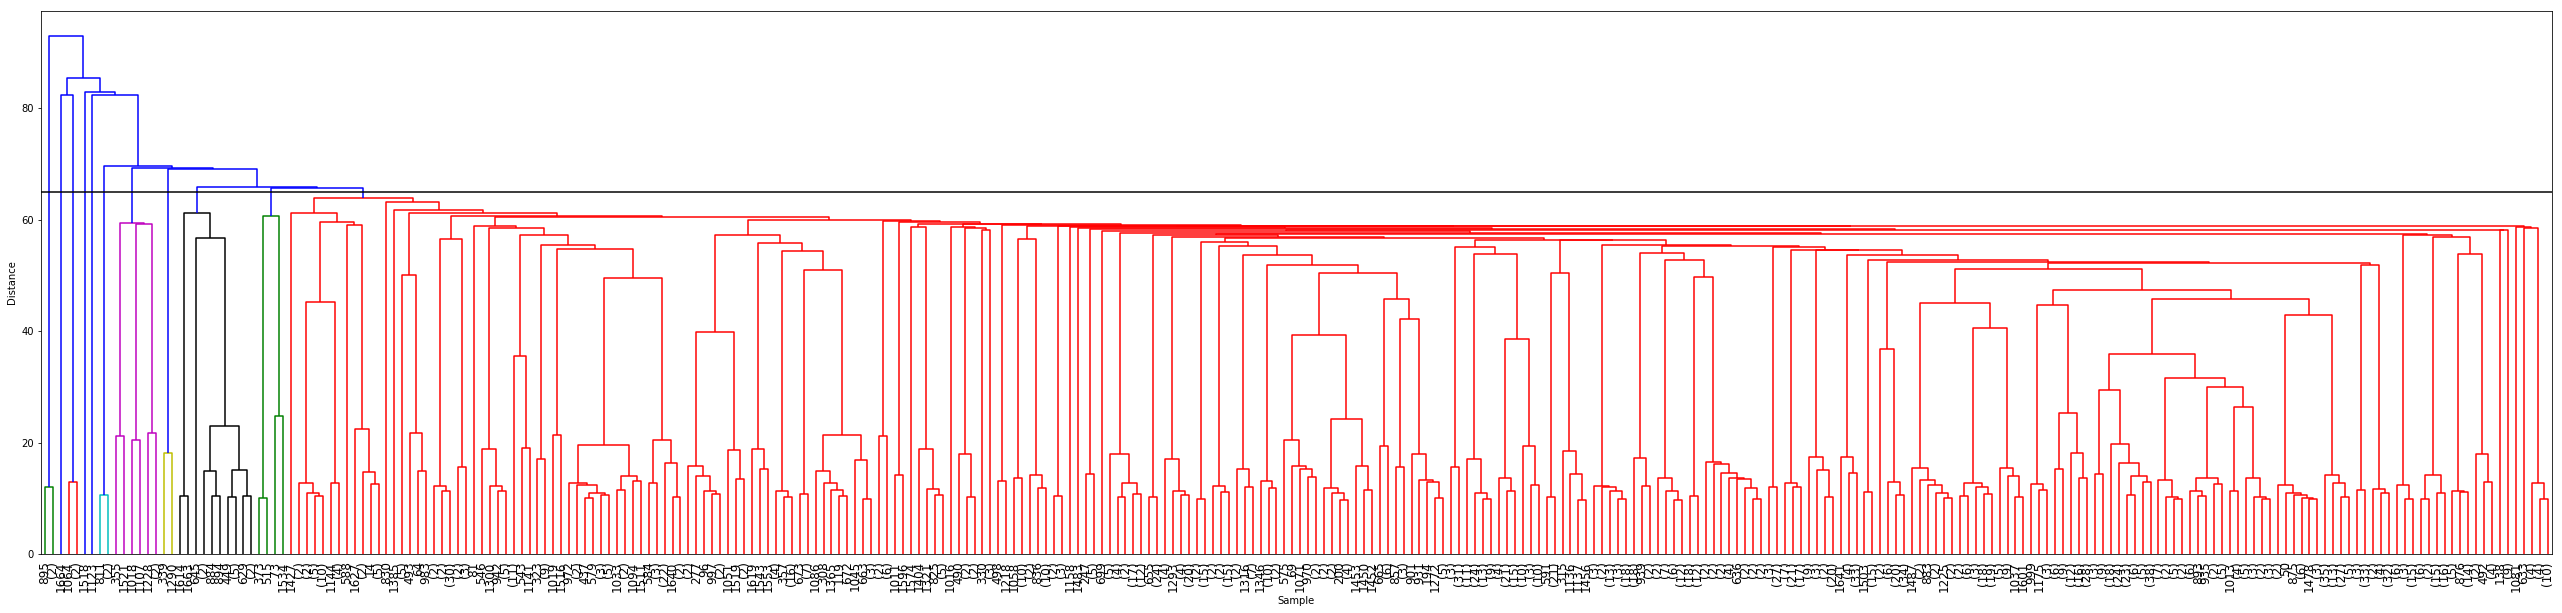

In [9]:
# Hierarchical clustering
Z = linkage(data_thresh, "ward")
max_d = 65

fig = plt.figure(figsize = (45,10))
plt.xlabel("Sample")
plt.ylabel("Distance")
dendrogram(
    Z,
    truncate_mode = "lastp",   # show only the last p merged clusters (no outliers)
    p = 316,                   # number of samples
    leaf_rotation = 90.,       # rotate x-axis labels
    leaf_font_size = 12.,      # font size of x-axis labels
)
plt.axhline(y = max_d, color = "k")
plt.show()

# The graph shows that there are sparse clusters. These can be excluded in the next round of analyses

In [10]:
# Determine the cluster assignments of the scaled data
# Ward's cluster analysis shows that there are four clusters
cluster = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")
cluster_assignment = cluster.fit_predict(data_thresh)
cluster_assignment

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
# Create a new dataframe of raw data to which the cluster assignments will be added
df2 = df

# Add the cluster assignment (array) as a new column to the new dataframe
df2["ClusterNo."] = pd.Series(cluster_assignment, index = df2.index)

# Preview the new dataframe
df2.head()

,reviews_rating,airportDistance_km,airport,apartment,attractions,bars,beach,boutique,breakfast,cabins,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,ClusterNo.
Name,,,,,,,,,,,,,,,,,,,,,
1906 Lodge At Coronado Beach,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
250 Main Hotel,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
AC Hotel Chicago Downtown,4.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
AC Hotel Miami Beach,5.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
AC Hotel by Marriott Boston Downtown,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [12]:
# Get counts for each cluster
df2.groupby("ClusterNo.")["reviews_rating"].count()

ClusterNo.
0    1662
1       3
2       4
3       1
Name: reviews_rating, dtype: int64

In [13]:
# Keep the samples in Cluster No. 0
df3 = df2[df2["ClusterNo."] == 0]
df3.shape

(1662, 126)

#### Filtered data (from Cluster No. 0)

In [14]:
# Scale the data
data_scaled2 = scaler.fit_transform(df3)
data_scaled2.shape

(1662, 126)

In [15]:
# Remove zero-variance variables
thresholder = VarianceThreshold(threshold = 0.5)

# Create a thresholder model
data_thresh2 = thresholder.fit_transform(data_scaled2)
data_thresh2.shape

(1662, 115)

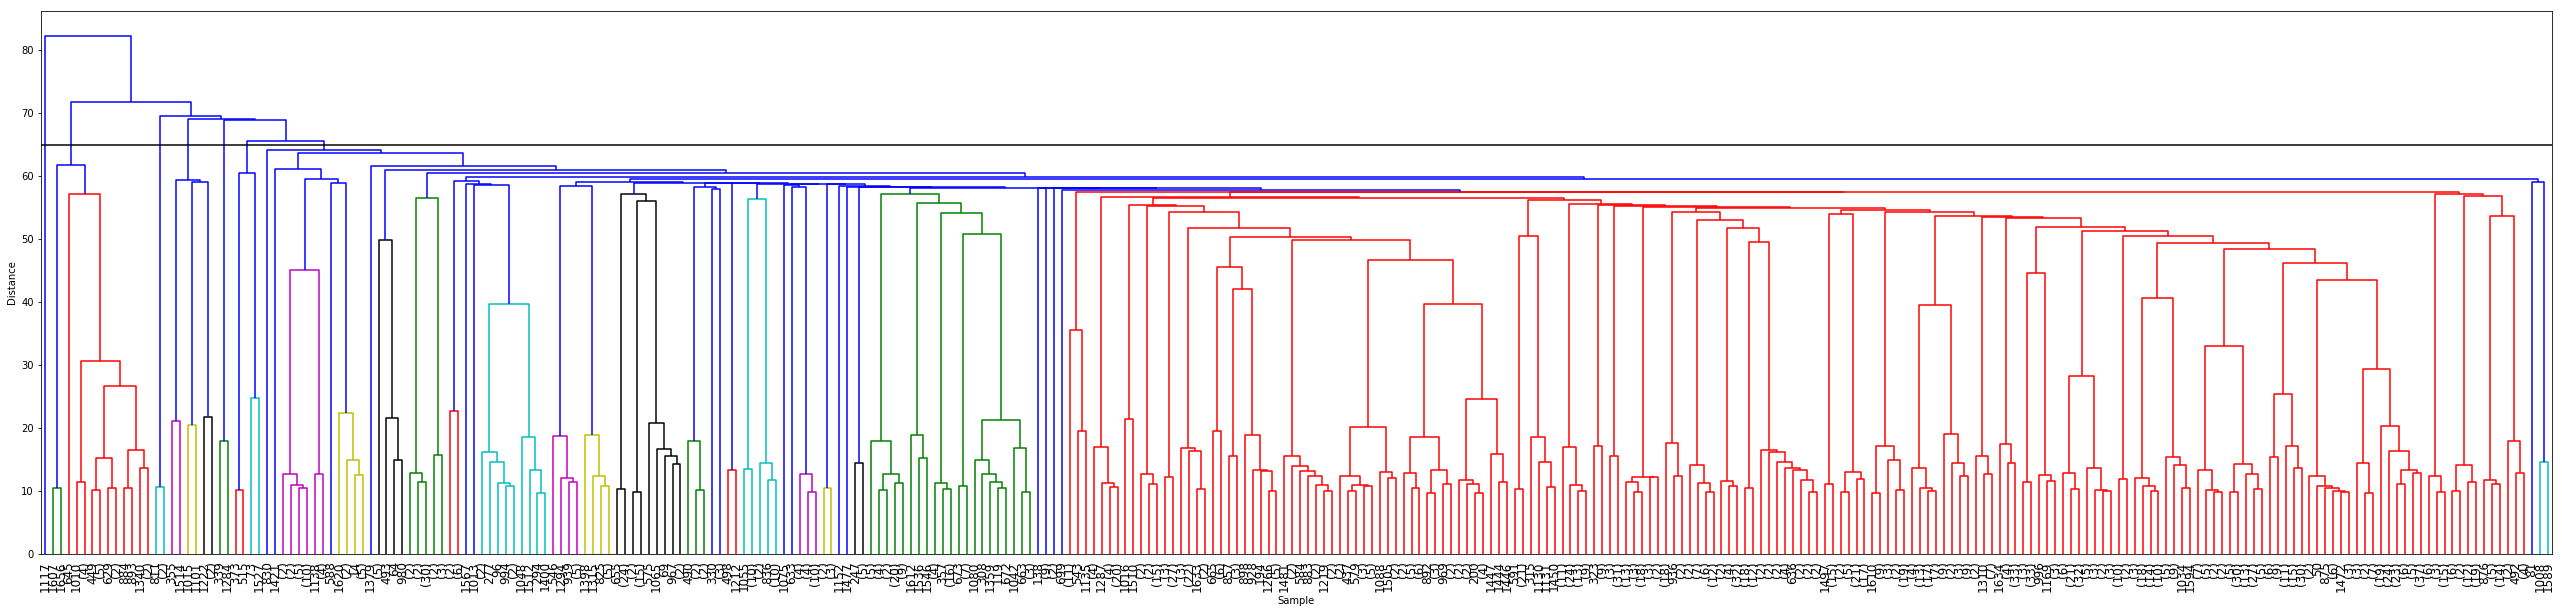

In [16]:
# Hierarchical clustering
Z = linkage(data_thresh2, "ward")
max_d = 65

fig = plt.figure(figsize = (45,10))
plt.xlabel("Sample")
plt.ylabel("Distance")
dendrogram(
    Z,
    truncate_mode = "lastp",   # show only the last p merged clusters (no outliers)
    p = 316,                   # number of samples
    leaf_rotation = 90.,       # rotate x-axis labels
    leaf_font_size = 12.,      # font size of x-axis labels
)
plt.axhline(y = max_d, color = "k")
plt.show()

In [17]:
# Determine the cluster assignments of the scaled data
# Ward's cluster analysis shows that there are four clusters
cluster2 = AgglomerativeClustering(n_clusters = 22, affinity = "euclidean", linkage = "ward")
cluster_assignment2 = cluster2.fit_predict(data_thresh2)

bins = np.bincount(cluster_assignment2) # number of hotels
ii = np.nonzero(bins)[0] # cluster number

list(zip(ii, bins[ii]))

[(0, 5),
 (1, 1499),
 (2, 20),
 (3, 10),
 (4, 16),
 (5, 8),
 (6, 39),
 (7, 13),
 (8, 24),
 (9, 3),
 (10, 8),
 (11, 1),
 (12, 2),
 (13, 2),
 (14, 2),
 (15, 1),
 (16, 2),
 (17, 1),
 (18, 2),
 (19, 2),
 (20, 1),
 (21, 1)]

In [18]:
len(df3)

1662

In [19]:
# Add the cluster assignment (array) as a new column to the new dataframe
df3["ClusterNo.-1"] = list(cluster_assignment2)

# Preview the new dataframe
df3.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,reviews_rating,airportDistance_km,airport,apartment,attractions,bars,beach,boutique,breakfast,cabins,...,2011,2012,2013,2014,2015,2016,2017,2018,ClusterNo.,ClusterNo.-1
Name,,,,,,,,,,,,,,,,,,,,,
1906 Lodge At Coronado Beach,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,7
250 Main Hotel,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
AC Hotel Chicago Downtown,4.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
AC Hotel Miami Beach,5.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
AC Hotel by Marriott Boston Downtown,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


### Hierarchical clustering: DBSCAN
Notes:
- Good for clusters of different shapes

In [20]:
# Dependencies
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score,\
adjusted_mutual_info_score, silhouette_score

In [21]:
# Compute DBSCAN
db = DBSCAN().fit(data_thresh)
core_sample_mask = np.zeros_like(db.labels_, dtype = bool)
core_sample_mask[db.core_sample_indices_] = True
labels = db.labels_
labels_true = df2["reviews_rating"]

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % completeness_score(labels_true, labels))
print("V-measure: %0.3f" % v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(data_thresh, labels))

Estimated number of clusters: 22
Estimated number of noise points: 1516
Homogeneity: 0.038
Completeness: 0.108
V-measure: 0.056
Adjusted Rand Index: -0.031
Adjusted Mutual Information: 0.012
Silhouette Coefficient: -0.326


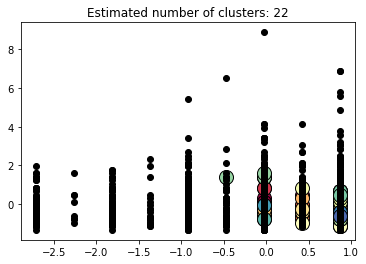

In [22]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data_thresh[class_member_mask & core_sample_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data_thresh[class_member_mask & ~core_sample_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()